# Map Development
A Jupyter Notebook to piece together how to best create the map with desired ui/ux


### TOC
- [Initial Data Form](#initialData)
- [UI/UX Goals](#uiGoals)
- [Data Statck and JS Libraries](#dataStackLibraries)
- [Process](#processing)

<a id='initialData'></a>
### Initial Data Form
All data files currently reside in json or geojson form within redlining-wealth-health-lexington/notebooks/data dir. Multiple files exist that have only the initial data sets. The final data files to use are

- race_cbtracts_hhi_own_val_pov_2019_gdf_json.json
- KYLexington1936.geojson

<a id='uiGoals'></a>
### UI/UX Goals
Full screen map  
Left hand side scrolling info panel   
Title center over top of map  
Bottom left menu drop up button to select which layer of data to view  
- % segregation/Race  
- Median household income  
- % population in poverty  
- home ownership %  
- property value reported  
Bottom left slider bar to change opacity level of over lying HOLC neighborhood grades  
Top right north arrow  
Top right zoom button  
Top right hide info button  

<a id='dataStackLibraries'></a>
### Data Stack and JS Libraries

1. HTML/SVG/CSS for ui/ux and website styling  
    - Intend to use mini version of: 
        - [Assembly.css](https://www.mapbox.com/assembly/documentation/)
    - Alternative Options include:
        - [Bootstrap](http://getbootstrap.com/)
        - [HTML5 Boilerplate](https://html5boilerplate.com/)
        - [Skeleton Boilerplate](http://getskeleton.com/)
        - [Pure.css](https://purecss.io/)
        - [Materialize](http://materializecss.com/)
2. Mapbox GL JS for loading vector tiles and smooth interaction
3. D3.js to load data as json and convert to geojson 
2. Mapbox GL JS Opacity/Slider Plug In. Example:
    - [Github Demo Example](https://github.com/dayjournal/mapbox-gl-opacity)
    - [Mapbox GL JS Example](https://docs.mapbox.com/mapbox-gl-js/example/adjust-layer-opacity/?q=add%20map%20layer%20geojson&size=n_10_n) Chicago raster map   
5. chroma.js potentially for color scale?  
6. Initially considered sparkline.js for tooltip specs of data or graphing but, probably something newer and maintained should be considered.  
7. Could use mapshaper to simplify any files if size becomes issue
8. Buttons/Info Panels examples:
    - 673-5 repo (Kenyan Education Map)  
    - Lexington Public Parks Throuh Redlining Lense Map  
    - 675-5 for Mapbox GL JS (plant hardiness zone map)  

*Should most definitely write the scripts for inital run inside index.html but then pull them out as separate script files to call within the index.html and simplify/reduce the scripting within the index.html.

<a id='processing'></a>
### Process/Status

#### Index.html Template
Create index.html file template **DONE**
- Within the header links to various stylesheets are being utilized.  
- An external css/styles.css stylesheet is being used to store my personal modifications of styling for the map. **modify/refine to place ui/ux approprpiately and adjust for mobile/desktop**  
- Body currently has access to map.   
- Base map pulled from personal style sheet (**modify/refine* later this is just to get the visualization of the project going**)  
- Data is loaded through d3.json and acessible through addLayer function **add two layers at once**  
  - current map layer is generic to show capability to access layer  
- Zoom rotation/navigation control added through mapbox GL plugin **DONE**
- Title bar added via div element and css **modify/refine**  

<a id ='investigate'></a>
#### Investigating
When investigating the locally viewed map can do the following:
Use Developer tools to see styling that is being selected. Since using both a styles.css file to further modify the initially loaded assembly.min may need confirmation of what rules are being followed.

To undock the Developer tools from side bar/bottom bar follow [this](https://developer.chrome.com/docs/devtools/customize/placement/). Essentially open command menu for developer tools by short cut Control+Shift+P then type in one of these commands: Dock to left, Dock to right, Dock to bottom, Undock into separate window or Restore last dock position. To toggle Restore last dock position with a keyboard shortcut, press Control+Shift+D (Linux/Windows).From there Elements, Styles, Console can each have their own menu. 

Side note: when using Mapbox it uses something called a [*canvas*](https://developer.mozilla.org/en-US/docs/Web/API/Canvas_API) which can at times make it difficult to investigate. In this instance may need to load a plug-in during development and turn the plug off after developed (comment out it's code) for launch.

**Elements** allows determination of separate entities. 
Select the element (div-class etc that you want to investigate) in the menu section of Elements. Selection is confirmed by the shadow over the div item.

**Styles** allows determination of how the element is being styled. 
With an element selected, in the Styles menu the rules being applied will be displayed. The rules at the top of the styles menu overide those at the bottom. Those that are not being applied are typically striked thru text. Items that can't be changed are those ! important items.  

To see the full script of rules visit the url styles page linked at the top of the index.html (min.assembly url). The API of the url will explain more about accessing the elements and styling them further with appropriate commands.
https://api.mapbox.com/mapbox-assembly/v0.24.0/assembly.css
https://labs.mapbox.com/assembly/documentation/

Additional understanding of css vs flex box https://www.freecodecamp.org/news/css-positioning-and-flexbox-explained/

Can also select a rule within this menu and turn it on or off using the checkboxes to see how the rule affects the element on the page (without having to go back into the code immediately/editing/saving every single time.)

**Console** shows what the page has access to data wise.

Using the notes above was able to diagnose why I was having trouble moving the slider opacity bar to the bottom of the page. Turns out by classifying a div as *map-overly top* I was overriding any alternative rules I'd place in styles.css. Needed to change it to *map-overlay bottom* and add ml24 mb36 to push it off the bottom of the page.

<a id='layerOpacity'></a>
#### Layer Opacity
https://docs.mapbox.com/mapbox-gl-js/example/adjust-layer-opacity/ 

Followed guidance in this example to create opacity slider.
This slider is linked to the redlining neighborhood data so that underlying data for comparison by tract level can be seen and reviewed at the same time. This makes it much easier to compare the census tract level (since it doesn't exactly line up with redlining layer) without having to turn off and on or constant slide a mid screen bar back and forth.
**Need to place slider further left in line with info panel**

<a id='infoPanel'></a>
#### Info Panel
- info scrolling panel added **needs extended to meet close to opacity slider**
- info button available and connected to infoPanel using this example https://sebhastian.com/javascript-show-hide-div-onclick-toggle/#:~:text=To%20display%20or%20hide%20a,which%20is%20block%20)%20to%20none%20

The scroll panel appears to be dipping below the map element. 
The intention is to have the map element fill the whole screen.
In an effort to determine why the panel dips below the map, added a background color to the body in styling.   
 `body {background: #2ecc71;}`
Turns out the body is going longer than map too. When resizing the screen to narrower width the info panel goes longer down the page and it's filled the body with more of the green. 

 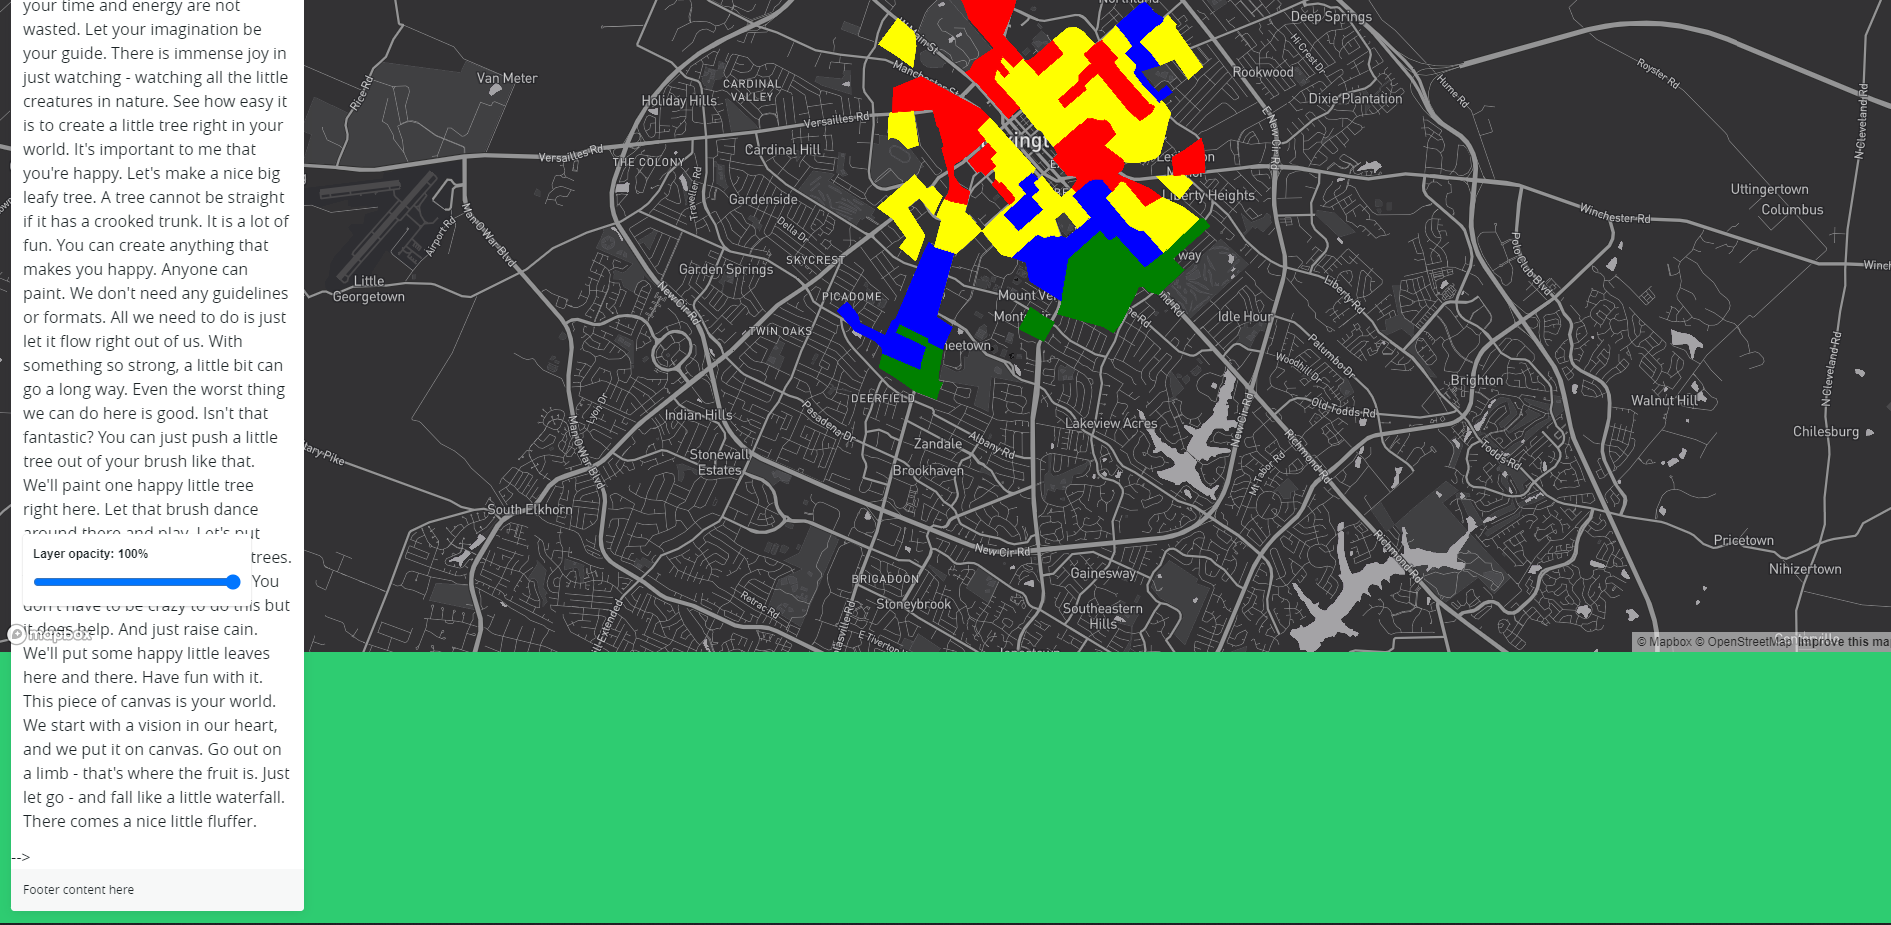

Thinking the body is inheriting something from the info panel since the text can't be hidden or scrolled? Turns out too many variations of heights were messing with the entire body from this scrolling text div class. Reduced it down to just `overflow-auto` for scrolling and `h-full` for height. 
 
 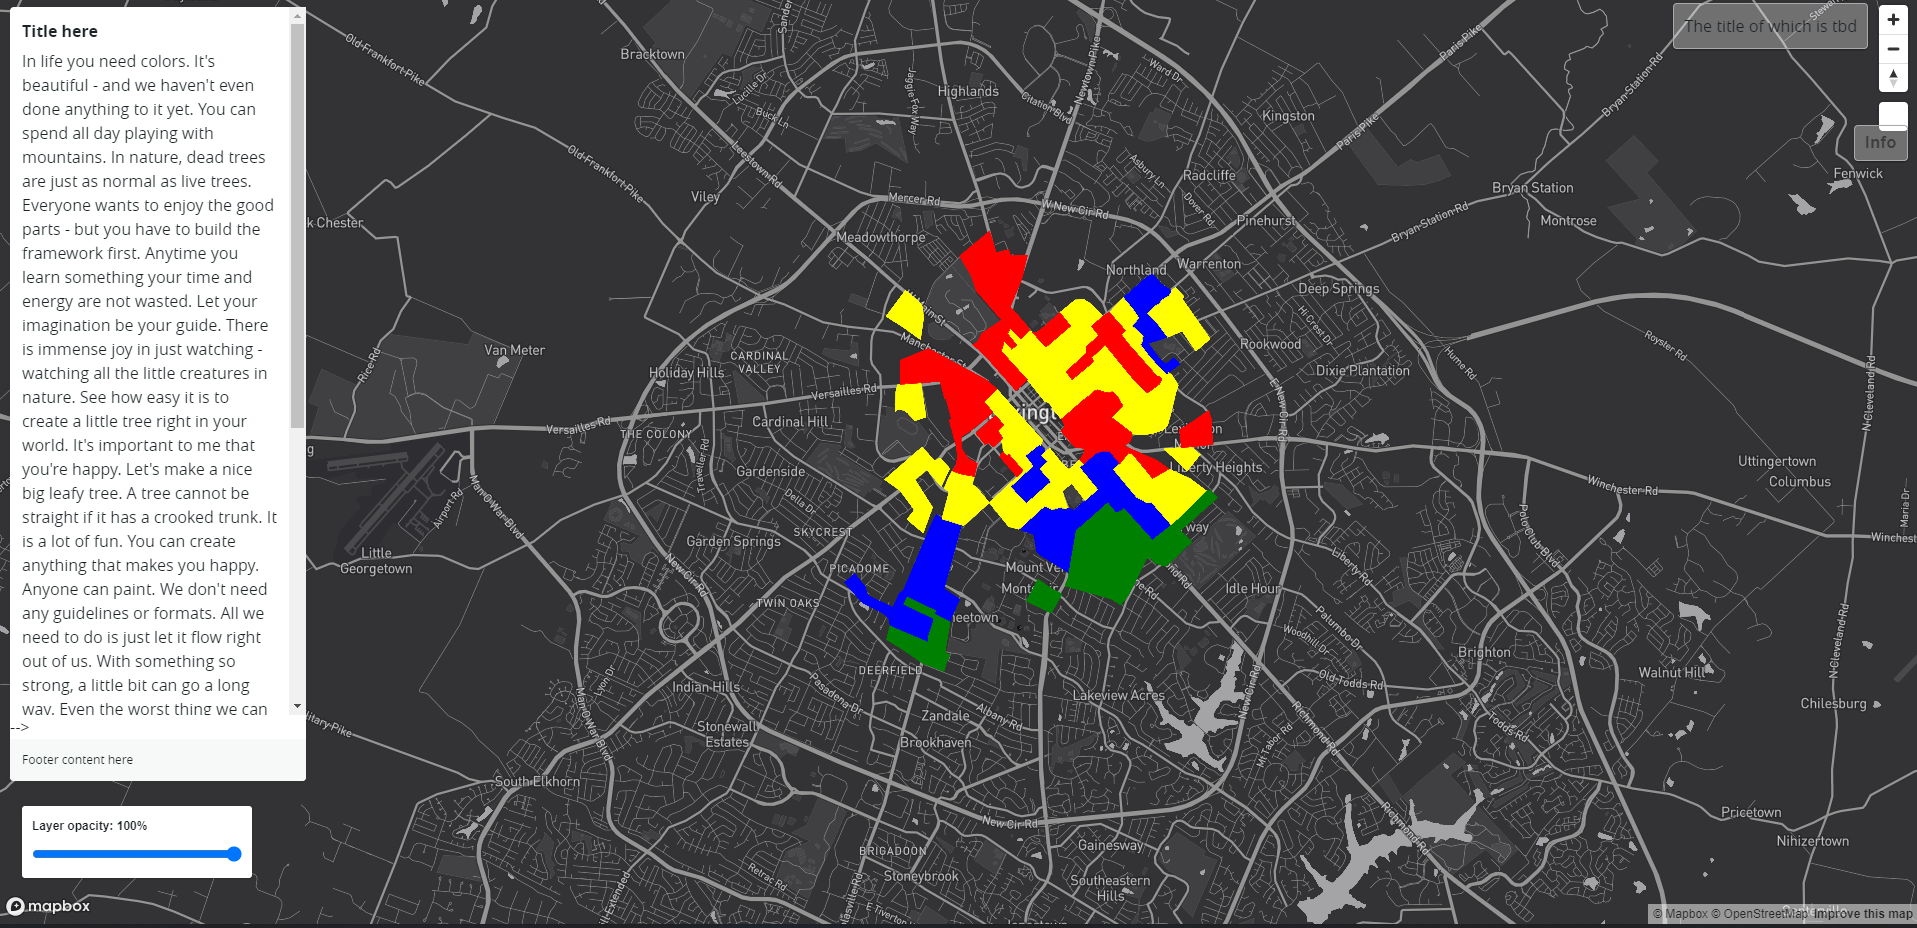


see above bolded for still need to do's
additionally need to add the multiple layers now to access
need to add button for menu selection of the mulitple layers
need to make sure functions on mobile device as well.

#### Mobile Friendly
Working on making website mobile friendly to start then scaling up from there. Now that there is a template to for appearance it's time to make sure it works for mobile.

Using [Assembly.css](#https://labs.mapbox.com/assembly/) rules about media queries.
Mobile-first media queries = fewer overrides. Start with a simple mobile layout, then add complexity with additional media-constrained rules. Assembly uses the following media queries:

Extra large screens: screen and (min-width: 1200px); Class affected by xl  
Large screens: screen and (min-width: 800px); Class affected by l  
Medium screens: screen and (min-width: 640px); Class affected by m  
Classes that take affect within certain media queries always end with a -m<size> suffix, where "size" is m, l, or xl.  
    
Also have layout scales [here](#https://labs.mapbox.com/assembly/layout-scales/) for margins, paddings, widths, heights.
    
https://github.com/mapbox/assembly visit for the github page
    
    https://stackoverflow.com/questions/56111480/how-can-i-hide-a-div-until-a-button-is-clicked understanding how to make it start hidden. need to modify the display on load to something specific.

#### Dual Maps & Sync?
This may be a better solution to viewing multiple sets of data at the same time as opposed to the opacity slider.


#### For Styling later visit the catalog
https://labs.mapbox.com/assembly/catalog/
Full screen view of it in action http://bl.ocks.org/boeric/raw/f6ddea14600dc5093506/